<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مبانی بینایی 3 بعدی (پاییز 1402)
        </font>
		<p></p>
        <h1 style="text-align: center">
        تمرین اول - بخش عملی
        </h1>
		<h2 style="text-align: center">
        نام و نام خانوادگی: Lachin Naghashyar
		<br>
		شماره دانشجویی: 98110179
		<br>
		</h2>
		</h3>
            
  

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 1
        </font>
		<p></p>
		<hr>
       الف- ماتریس زیر را در نظر بگیرید، با استفاده از کتابخانه‌های موجود یک 2D DFT بر روی آن اعمال کنید و به فضای فرکانس ببرید و نتیجه را چاپ نمایید.
	   <br>
	</font>
</div>

In [1]:
import numpy as np

matrix = np.array([[3,4,-3,1,2],
              [6,5,-4,8,-6],
              [-7,1,5,7,9],
              [-9,-2,5,6,3],
              [9,6,8,-2,5]])


dft_matrix = np.fft.fft2(matrix)


print("Original Matrix:\n", matrix)
print("\nDiscrete Fourier Transform:\n", dft_matrix)



Original Matrix:
 [[ 3  4 -3  1  2]
 [ 6  5 -4  8 -6]
 [-7  1  5  7  9]
 [-9 -2  5  6  3]
 [ 9  6  8 -2  5]]

Discrete Fourier Transform:
 [[ 60.         +0.j         -14.73606798 +4.33901075j
  -10.26393202 -9.1472939j  -10.26393202 +9.1472939j
  -14.73606798 -4.33901075j]
 [  3.2532889  +9.11453775j  40.08610463-11.63719218j
  -10.        -14.49036173j  40.02379874 +8.75126649j
   29.53444185+16.6497449j ]
 [-15.7532889 +21.40502748j -12.52379874+19.86618572j
  -32.58610463 -4.56352474j   0.46555815-12.05346401j
  -10.         -6.3268805j ]
 [-15.7532889 -21.40502748j -10.         +6.3268805j
    0.46555815+12.05346401j -32.58610463 +4.56352474j
  -12.52379874-19.86618572j]
 [  3.2532889  -9.11453775j  29.53444185-16.6497449j
   40.02379874 -8.75126649j -10.        +14.49036173j
   40.08610463+11.63719218j]]


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
       ب- بدون استفاده از کتابخانه‌های آماده خودتان تابع تبدیل فوریه را بنویسید و تصویر 1.jpg را به فضای فوریه ببرید و نتیجه را چاپ کنید.
</font>
</div>

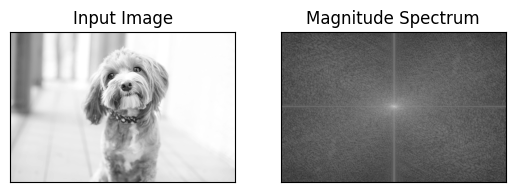

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'/1.jpg', 0)

def FFT1D(x):
    N = len(x)
    if N <= 1: return x
    even = FFT1D(x[0::2])
    odd =  FFT1D(x[1::2])
    T= [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def FFT2D(image):
    M, N = image.shape
    fft_rows = np.array([FFT1D(row) for row in image])
    fft_image = np.array([FFT1D(column) for column in fft_rows.T]).T
    return fft_image

f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 2
        </font>
		<p></p>
		<hr>
       فیلترهای فضایی Smooth کردن تصویر شامل Gaussian Blur, Average Pooling و Low pass filter را خودتان پیاده سازی کرده و بر روی تصویر 2.png اعمال کنید.
	   <br>
	</font>
</div>

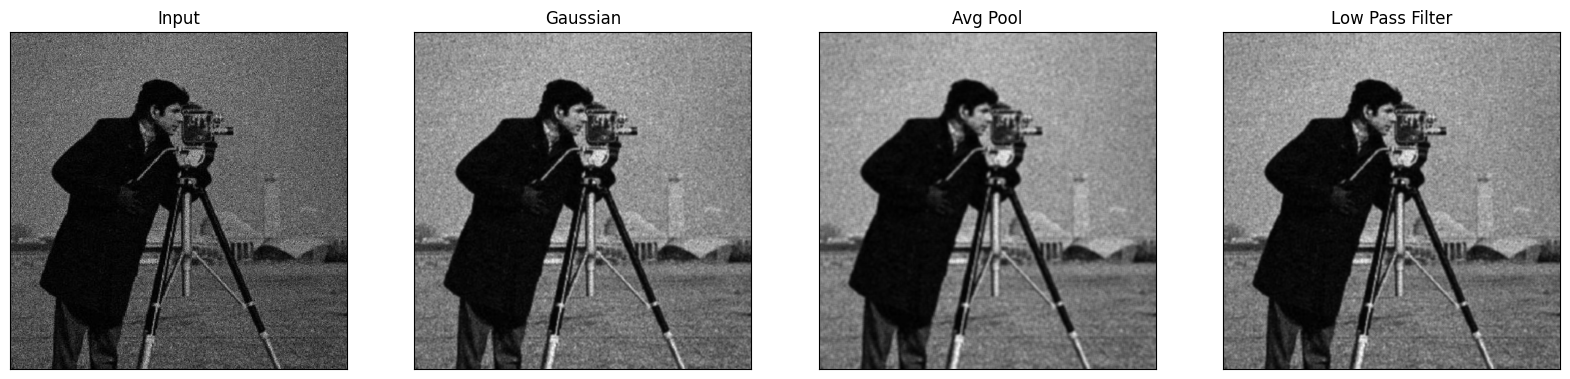

In [5]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from matplotlib import pyplot as plt

def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2+(y-(size-1)/2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

def average_pooling_kernel(size):
    kernel = np.ones((size, size))
    return kernel / np.sum(kernel)

def low_pass_filter_kernel(size, cutoff_frequency):
    center = size // 2
    kernel = np.zeros((size, size))
    for x in range(size):
        for y in range(size):
            if (x - center)**2 + (y - center)**2 <= cutoff_frequency**2:
                kernel[x, y] = 1
    kernel = kernel / np.sum(kernel)
    return kernel

def apply_filter(image, kernel):
    return convolve2d(image, kernel, boundary='symm', mode='same')

img = cv2.imread('/2.png', cv2.IMREAD_GRAYSCALE)

# Gaussian Blur
gaussian_kernel_size = 5
sigma = 1.0
gaussian_kernel = gaussian_kernel(gaussian_kernel_size, sigma)
gaussian_img = apply_filter(img, gaussian_kernel)

# Average Pooling
average_kernel_size = 5
average_kernel = average_pooling_kernel(average_kernel_size)
avg_pool_img = apply_filter(img, average_kernel)

# Low Pass Filter
low_pass_kernel_size = 5
cutoff_frequency = 2
low_pass_kernel = low_pass_filter_kernel(low_pass_kernel_size, cutoff_frequency)
low_pass_filtered_image = apply_filter(img, low_pass_kernel)

plt.figure(figsize=(20, 5))
plt.subplot(141),plt.imshow(img, cmap='gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(avg_pool_img, cmap='gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(low_pass_filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 3
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و تبدیل‌های HSV و YCbCr را بر روی تصاویر اعمال کرده و در خروجی نشان دهید.
	   <br>
	</font>
</div>

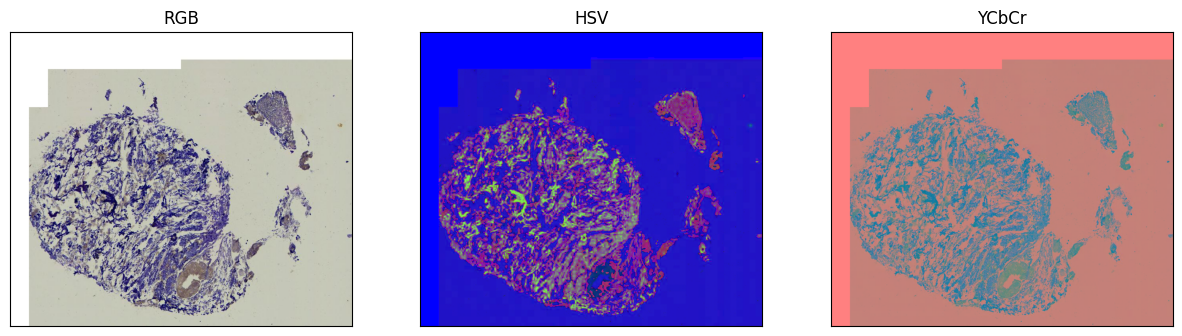

In [13]:
import cv2
from matplotlib import pyplot as plt

img_bgr = cv2.imread('/3.jpg')

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
ycbcr_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img_rgb)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(hsv_img)
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(ycbcr_img)
plt.title('YCbCr'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 4
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و پس از حذف نویزهای نمک و فلفلی از روی تصویر، بک‌گراند تصویر را حذف کنید. (دقت کنید که بک‌گراند شامل بخش‌های سفیدرنگ و بخش‌های کرمی‌رنگ می‌باشد.)
	   <br>
	</font>
</div>

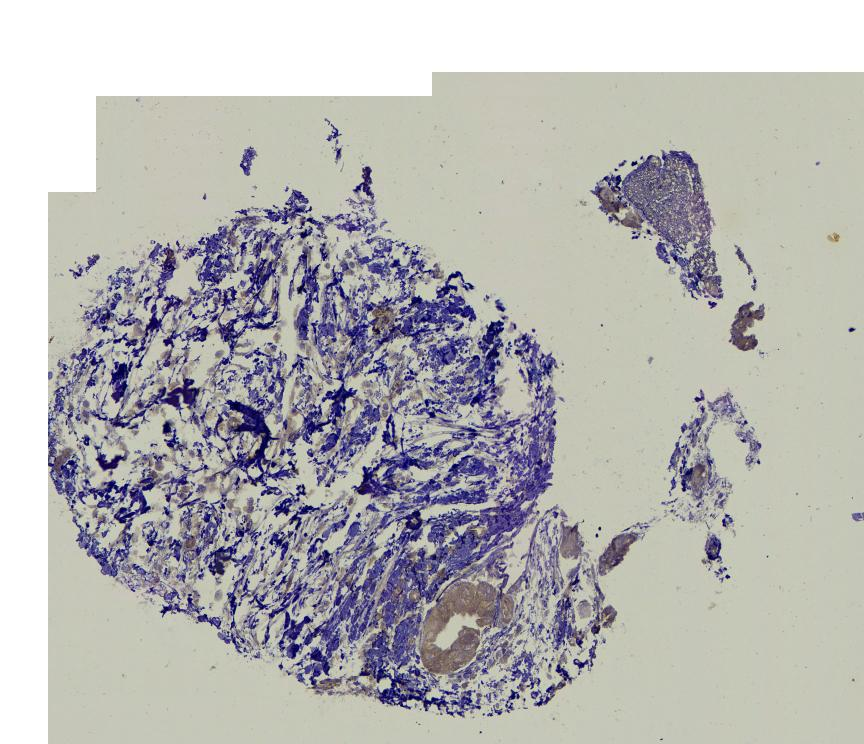

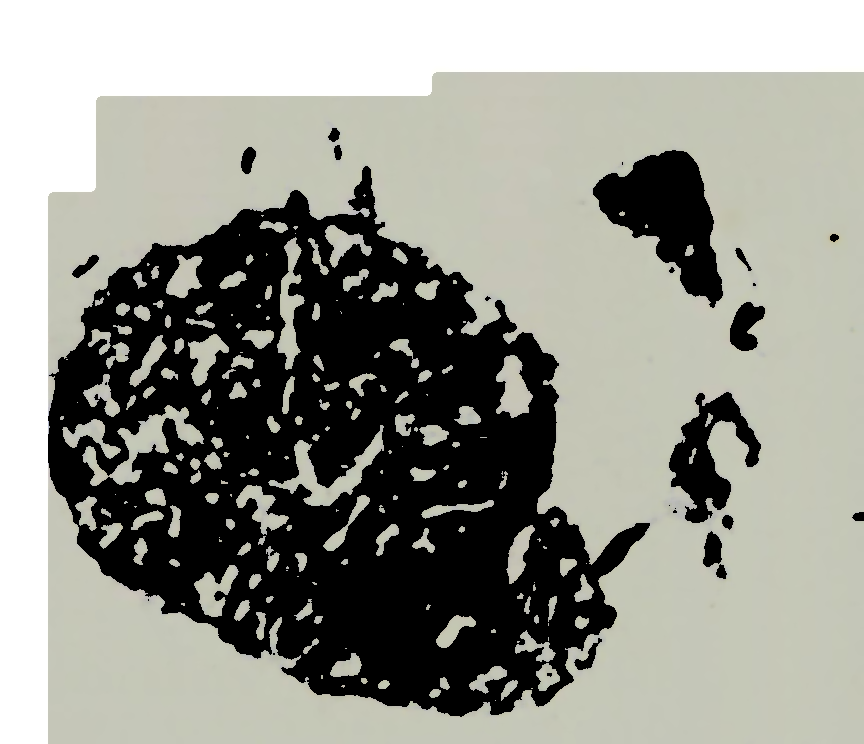

In [24]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


img = cv2.imread('/3.jpg')

median_filtered = cv2.medianBlur(img, 9)

gray = cv2.cvtColor(median_filtered, cv2.COLOR_BGR2GRAY)

_, binary_thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)
background_mask = cv2.bitwise_not(binary_thresh)

foreground = cv2.bitwise_and(median_filtered, median_filtered, mask=background_mask)

cv2_imshow(img)
cv2_imshow(foreground)
cv2.waitKey(0)
cv2.destroyAllWindows()
